### 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Q1= pd.read_csv('delivery_time.csv')
Q1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
Q1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

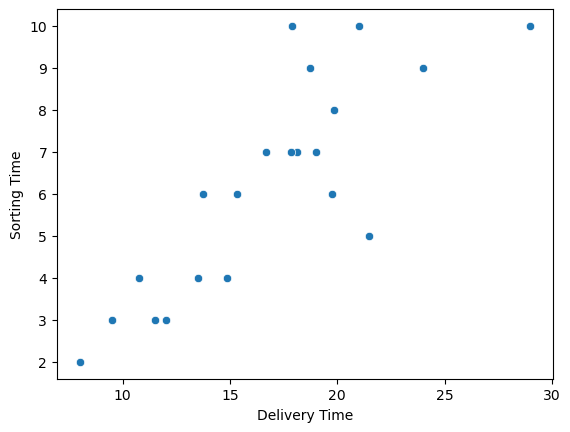

In [6]:
sns.scatterplot(x=Q1['Delivery Time'],y=Q1['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

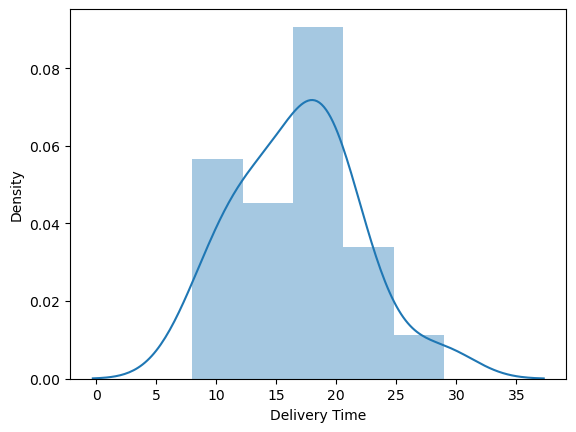

In [7]:
sns.distplot (Q1["Delivery Time"])

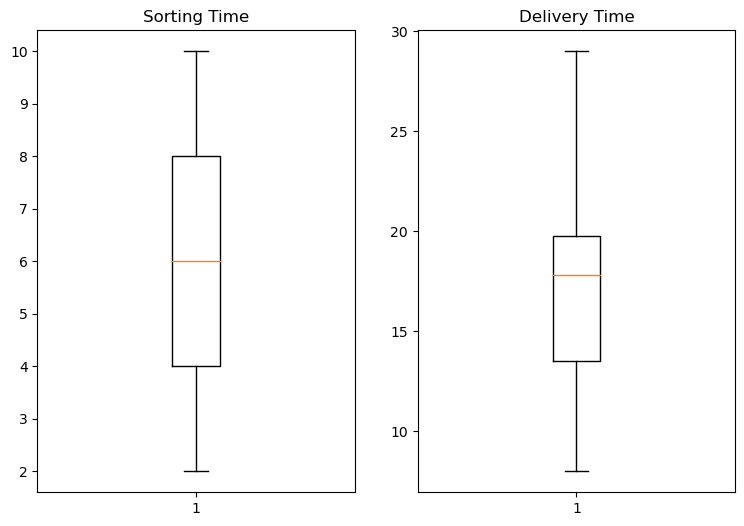

In [8]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(Q1['Sorting Time'])
plt.title('Sorting Time')
plt.subplot(122)
plt.boxplot(Q1['Delivery Time'])
plt.title('Delivery Time')
plt.show()

In [9]:
Q1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
# Renaming Column Name
Q1a=Q1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

## Model Creation

In [11]:
model = smf.ols("delivery_time ~sorting_time" ,data = Q1a).fit()

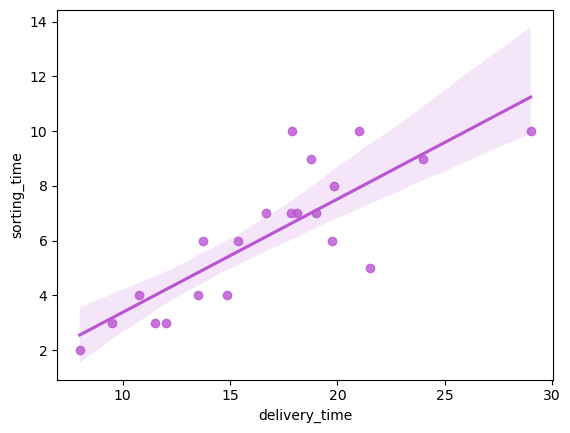

In [12]:
sns.regplot(x="delivery_time", y="sorting_time", data=Q1a, color='mediumorchid');

In [13]:
model.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.98e-06
Time:                        23:37:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

## Square Root transformation on data

In [15]:
model1 = smf.ols("np.sqrt(delivery_time) ~np.sqrt(sorting_time)" ,data = Q1a).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 10 May 2023   Prob (F-statistic):           8.48e-07
Time:                            23:37:15   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cuberoot transformation on Data

In [17]:
model12 = smf.ols("np.cbrt(delivery_time) ~np.cbrt(sorting_time)" ,data = Q1a).fit()

In [18]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 10 May 2023   Prob (F-statistic):           4.90e-07
Time:                            23:37:15   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log transformation on Data

In [19]:
model123 = smf.ols("np.log(delivery_time) ~np.log(sorting_time)" ,data = Q1a).fit()

In [20]:
model123.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 10 May 2023   Prob (F-statistic):           1.60e-07
Time:                           23:37:16   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [21]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [23]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Residual Analysis*

### Test for Noramlity of Residual through QQ plot*

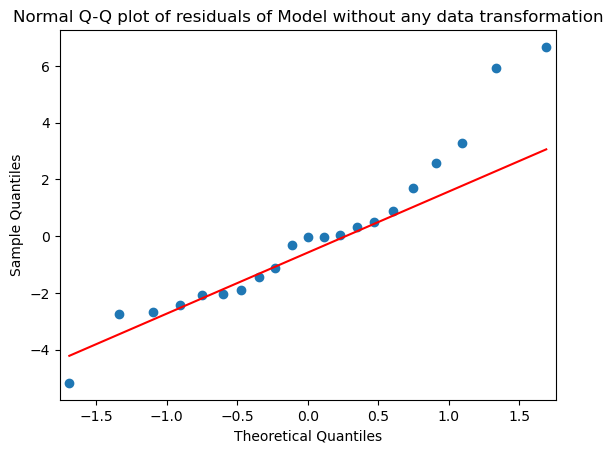

In [24]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [25]:
list(np.where(model.resid>0.6))

[array([ 2,  3,  4,  6, 15, 20], dtype=int64)]

In [26]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std()

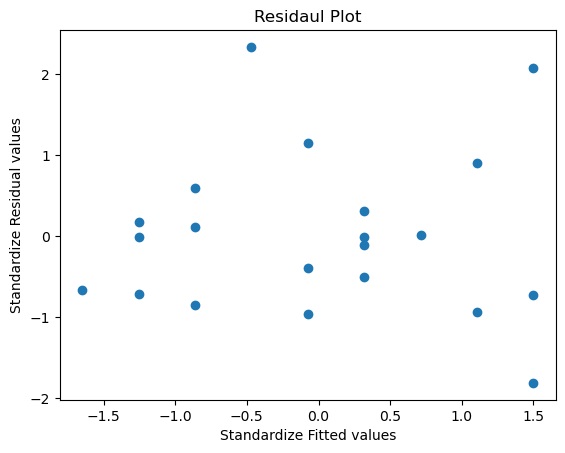

In [27]:
plt.scatter(get_standardize_values(model.fittedvalues), 
            get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

eval_env: 1


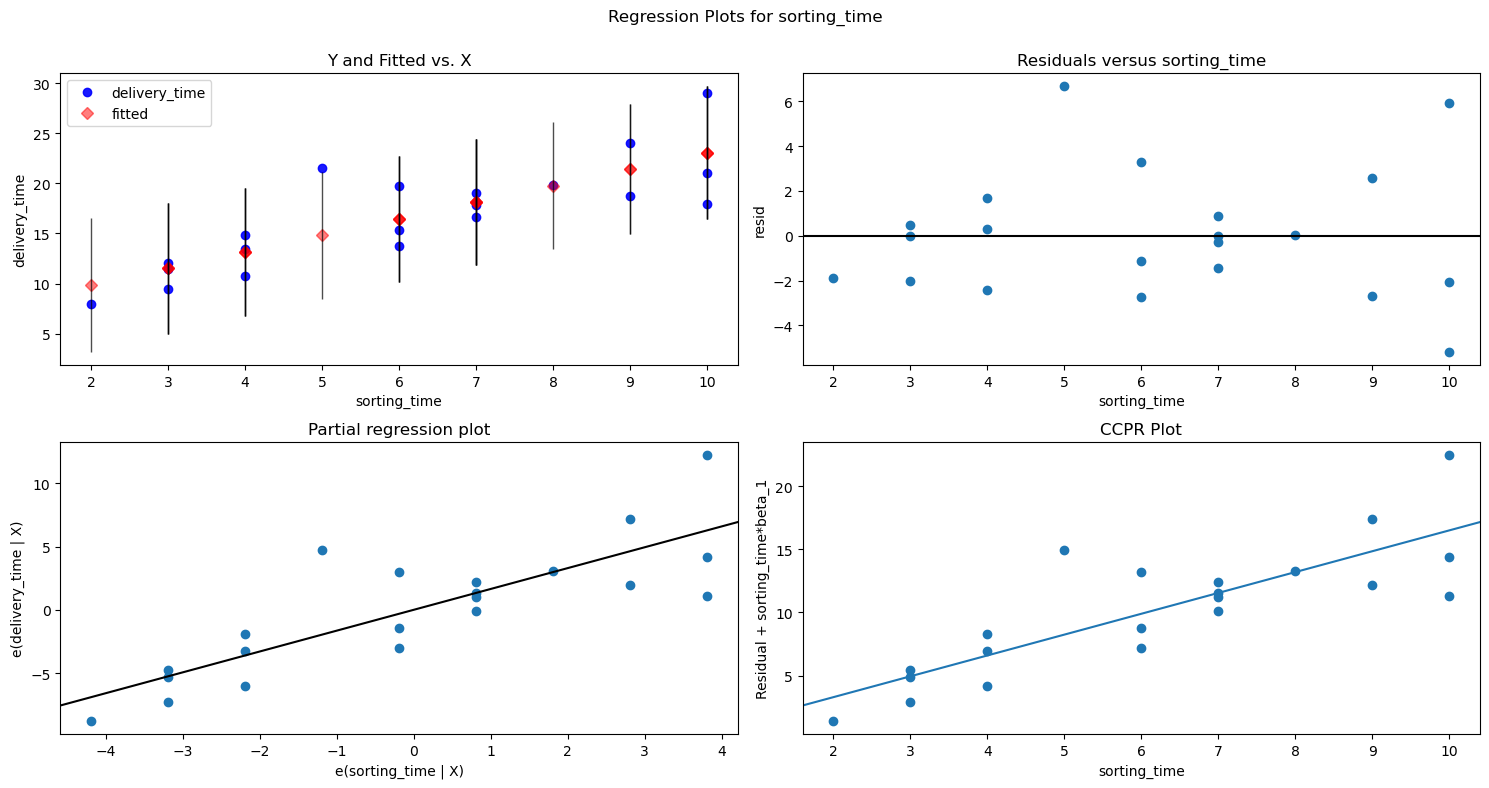

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sorting_time", fig=fig)
plt.show()

## Cook Distance

In [29]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [30]:
model_influence

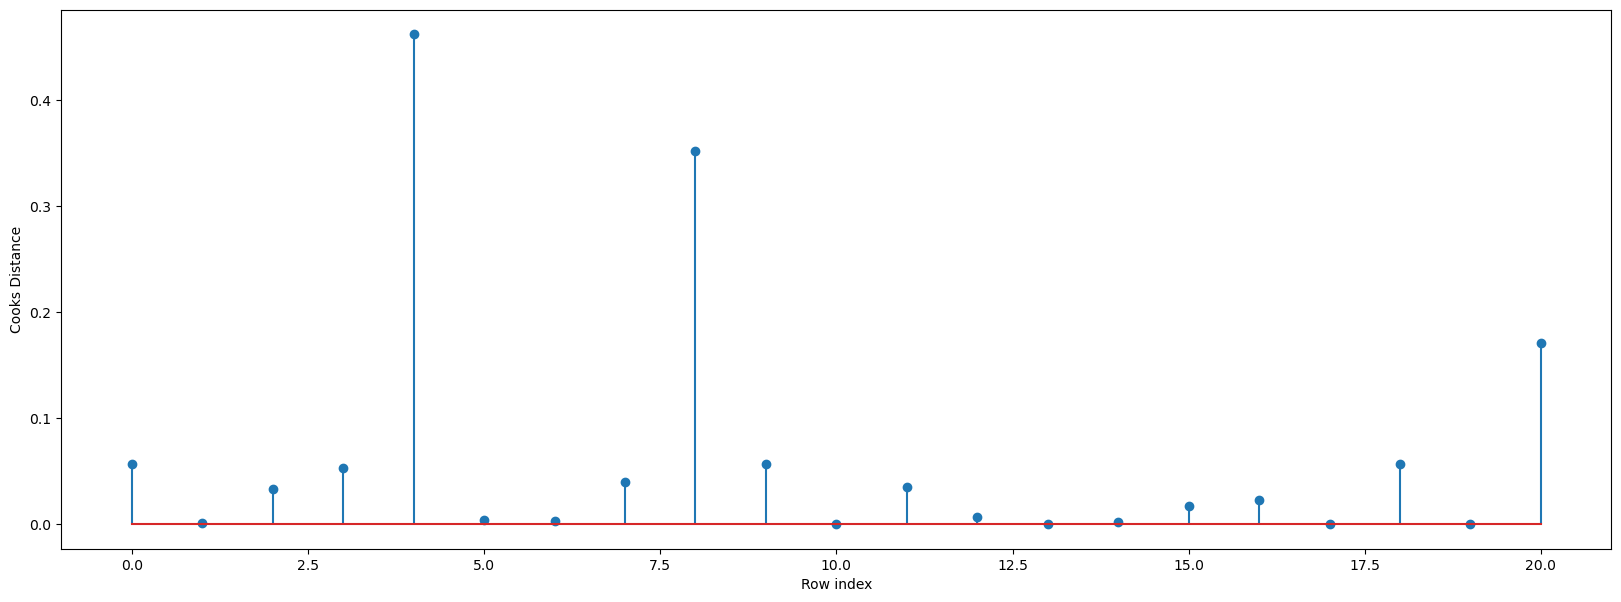

In [31]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Q1a)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
(np.argmax(c), np.max(c))

(4, 0.462053041265031)

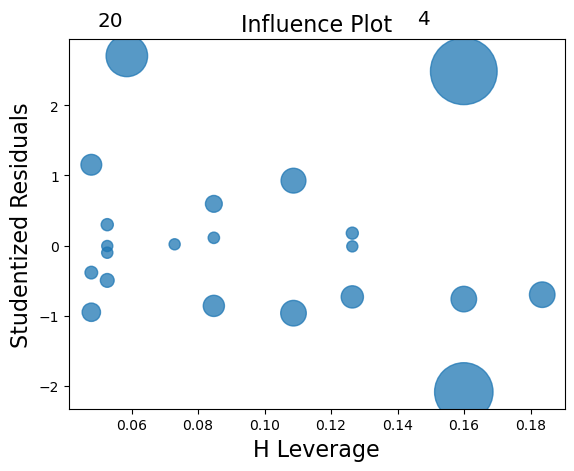

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = Q1a.shape[1]
n = Q1a.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.42857142857142855

### Cook distance Guildlines
#### If Di is greater than 0.5, then the ith data point is worthy of further investigation as it may be influential.
#### If Di is greater than 1, then the ith data point is quite likely to be influential.
#### Hence we will not remove as it is less than 0.5

## Model Predication

## 1) Random Sorting Time

In [35]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [36]:
## Predication (Storting time: 10)
delivery_time= (6.582734)+(1.649020)*(5)
delivery_time

14.827834

In [37]:
series= pd.Series ([5,10,15,20,25])
series

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [38]:
AA= pd.DataFrame(series, columns=["sorting_time"])
AA

,sorting_time
0,5
1,10
2,15
3,20
4,25


In [39]:
model.predict (AA)

0    14.827833
1    23.072933
2    31.318032
3    39.563132
4    47.808231
dtype: float64

## 2) Dataset based Predication

In [40]:
Final = Q1a.copy()
Final.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [41]:
A=model.predict (Final['sorting_time'])
A

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [42]:
Q1['Model_Predicted_delivery_time']= A

In [43]:
Q1

,Delivery Time,Sorting Time,Model_Predicted_delivery_time
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913
